In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import math
from dataset2pkl_train import MILDataset # traim
# from dataset2pkl_test_public import MILDataset # test_public
import pickle
import cv2
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
# %pwd

In [24]:
df = pd.read_csv('../dataset/train_dataset.csv')

In [27]:
patch_counts = {}
for index, slide_name in enumerate(tqdm(df['Slide_name'].tolist())):
    # slide_name = df.iloc[index]['Slide_name']
    patch_path = f'../re_pickle_train_patch/{slide_name}_patch.pkl' # f'../pickle_test_public_patch/dataset_{slide_name}_patch.pkl'
    # print(patch_path)
    with open(patch_path, 'rb') as f:
        patch_file = pickle.load(f)
    # print(len(patch_file))
    patch_counts[slide_name] = len(patch_file)

100% 894/894 [1:11:35<00:00,  4.80s/it]


In [29]:
# print(patch_counts)

In [32]:
patch_counts = dict(sorted(patch_counts.items(), key=lambda x : x[1], reverse=True))
print(patch_counts)

{'train_881': 2139, 'train_869': 2028, 'train_633': 1853, 'train_782': 1764, 'train_226': 1763, 'train_894': 1748, 'train_555': 1710, 'train_875': 1683, 'train_609': 1642, 'train_266': 1617, 'train_228': 1607, 'train_155': 1588, 'train_789': 1583, 'train_227': 1548, 'train_756': 1518, 'train_005': 1507, 'train_040': 1489, 'train_350': 1482, 'train_814': 1466, 'train_103': 1450, 'train_755': 1445, 'train_157': 1419, 'train_773': 1403, 'train_556': 1374, 'train_418': 1343, 'train_110': 1337, 'train_229': 1317, 'train_868': 1313, 'train_771': 1287, 'train_855': 1285, 'train_352': 1277, 'train_613': 1277, 'train_039': 1275, 'train_445': 1260, 'train_787': 1257, 'train_772': 1248, 'train_706': 1242, 'train_536': 1241, 'train_107': 1239, 'train_612': 1228, 'train_098': 1226, 'train_827': 1221, 'train_069': 1218, 'train_487': 1216, 'train_813': 1216, 'train_361': 1213, 'train_845': 1211, 'train_479': 1209, 'train_879': 1205, 'train_781': 1201, 'train_830': 1200, 'train_009': 1196, 'train_506'

In [37]:
# list(patch_counts.keys())

saved File number :  895
21 train_157 (1419 patches)


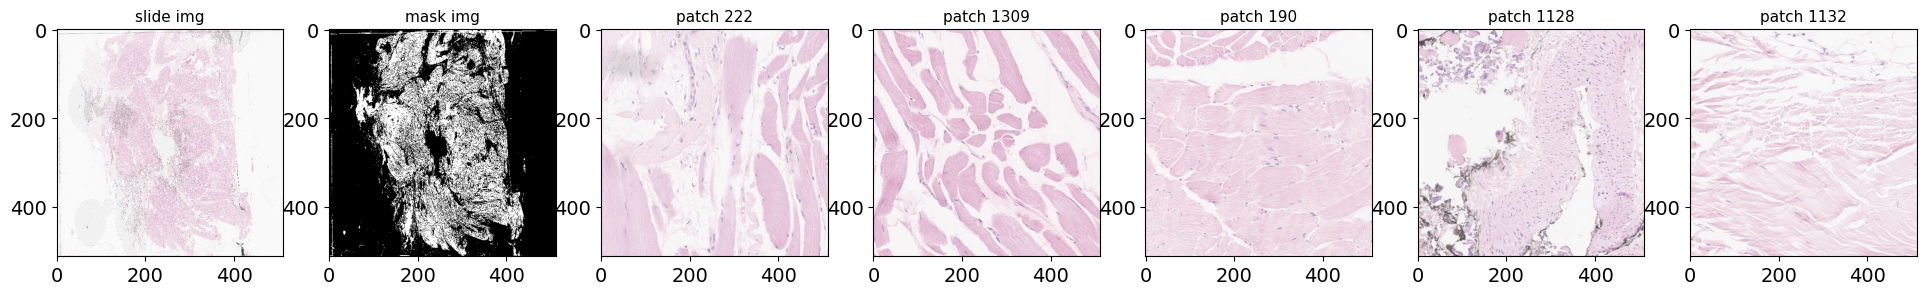

In [55]:
# visualize

file_list = os.listdir('../re_pickle_train_mask/')
file_count = len(file_list)
print("saved File number : ", file_count)

for i in range(21, 22): # 3 2
# for index, (key, value) in enumerate(patch_counts.items()):
    try:
        # index = random.randint(0, file_count)
        # index = 635 455 893 314
        # slide_name = df.iloc[index]['Slide_name']
        # print(index, slide_name)
        
        slide_name = list(patch_counts.keys())[i]

        slide_path = f'../dataset/train/{slide_name}.png'
        mask_path = f'../re_pickle_train_mask/{slide_name}_mask.pkl'
        patch_path = f'../re_pickle_train_patch/{slide_name}_patch.pkl'

        with open(mask_path, 'rb') as f:
            mask_file = pickle.load(f)
        with open(patch_path, 'rb') as f:
            patch_file = pickle.load(f)

        # print(f'{index} {slide_name} ({len(patch_file)} patches)')
        print(f'{i} {slide_name} ({len(patch_file)} patches)')
        plt.figure(figsize=(24, 3)) # (12, 8)

        slide_file = cv2.imread(slide_path)
        slide_file = cv2.cvtColor(slide_file, cv2.COLOR_BGR2RGB) # (OpenCV) BGR -> (matplotlib) RGB
        slide_file = cv2.resize(slide_file, (512, 512))
        
        plt.subplot(1, 7, 1)
        plt.imshow(slide_file)
        plt.title('slide img', fontsize=11)

        mask_file = cv2.resize(mask_file, (512, 512))
        plt.subplot(1, 7, 2)
        plt.imshow(mask_file, cmap='gray')
        plt.title('mask img', fontsize=11)

        for i in range(5):
            idx = random.randint(0, len(patch_file))
            # print(patch_file[idx])
            patch = patch_file[idx][0].T.cpu().numpy()
            # print(f'# each patch : {type(patch_file[idx][0])}, {patch_file[idx][0].shape} -> {type(patch)}, {patch.shape}')
            
            plt.subplot(1, 7, i+3)
            plt.imshow(patch) #, cmap='grey')
            plt.title(f'patch {idx}', fontsize=11)

        plt.show()
    
    except FileNotFoundError as err:
        print(f"No file name with index {index}")
        break

In [53]:
root = '../total_split_train_val'

for i in range(5):
    
    print(os.path.join(root, f'fold_{i}_train.csv'))
    print(os.path.join(root, f'fold_{i}_val.csv'))
    train_df = pd.read_csv(os.path.join(root, f'fold_{i}_train.csv'))
    val_df = pd.read_csv(os.path.join(root, f'fold_{i}_val.csv'))
    # print(len(train_df), train_df.shape[1], len(val_df), val_df.shape[1])
    
    assert len(train_df) + len(val_df) == 894
    # assert train_df.shape[1] == val_df.shape[1] # cols : (base) + index, recurrence_period, pseudo_label
    
    train_patches = {}
    val_patches = {}
    
    for index, slide_name in enumerate(train_df['Slide_name'].tolist()):
        # patch_path = f'../pickle_train_patch/dataset_{slide_name}_patch.pkl'
        # with open(patch_path, 'rb') as f:
        #     patch_file = pickle.load(f)
        if slide_name == 'train_894':
            print(f' (fold_{i}_train) skip {slide_name} !')
            # print(f' {slide_name} in fold_{i}_train')
            continue
        # else:
        #     train_patches[slide_name] = patch_counts[slide_name] # len(patch_file)
        train_patches[slide_name] = patch_counts[slide_name] # len(patch_file)
    train_patches = dict(sorted(train_patches.items(), key=lambda x : x[1], reverse=True))
    
    for index, slide_name in enumerate(val_df['Slide_name'].tolist()):
        # patch_path = f'../pickle_val_patch/dataset_{slide_name}_patch.pkl'
        # with open(patch_path, 'rb') as f:
        #     patch_file = pickle.load(f)
        if slide_name == 'train_894':
            print(f' (fold_{i}_val) skip {slide_name} !')
            # print(f' {slide_name} in fold_{i}_val')
            continue
        # else:
        #     val_patches[slide_name] = patch_counts[slide_name] # len(patch_file)
        val_patches[slide_name] = patch_counts[slide_name] # len(patch_file)
    val_patches = dict(sorted(val_patches.items(), key=lambda x: x[1], reverse=True))
    
    trains = sum(train_patches.values())
    vals = sum(val_patches.values())
    print(f">> {trains} ({trains/(trains+vals)*100:.2f}) | {vals} ({vals/(trains+vals)*100:.2f})")
    print()

../total_split_train_val/fold_0_train.csv
../total_split_train_val/fold_0_val.csv
 (fold_0_train) skip train_894 !
>> 437001 (78.05) | 122881 (21.95)

../total_split_train_val/fold_1_train.csv
../total_split_train_val/fold_1_val.csv
 (fold_1_train) skip train_894 !
>> 446527 (79.75) | 113355 (20.25)

../total_split_train_val/fold_2_train.csv
../total_split_train_val/fold_2_val.csv
 (fold_2_train) skip train_894 !
>> 454180 (81.12) | 105702 (18.88)

../total_split_train_val/fold_3_train.csv
../total_split_train_val/fold_3_val.csv
 (fold_3_val) skip train_894 !
>> 462076 (82.53) | 97806 (17.47)

../total_split_train_val/fold_4_train.csv
../total_split_train_val/fold_4_val.csv
 (fold_4_train) skip train_894 !
>> 439744 (78.54) | 120138 (21.46)

